In [24]:
import numpy as np
from scipy.linalg import svd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.utils.extmath import randomized_svd as rsvd
from time import time
from time import perf_counter

**Сравнение погрешностей SVD и R-SVD**

In [41]:
# Функция для генерации матрицы A
def generate_matrix(M, N):
    A = np.zeros((M, N))
    for i in range(M):
        for j in range(N):
            A[i, j] = 1 / (i + j + 1)
    return A

# Функция для вычисления ошибки SVD
def calculate_svd_error(A, rank):
    # Выполнение SVD
    U, S, V = svd(A, full_matrices=False)
    # Формирование диагональной матрицы из сингулярных чисел
    S = np.diag(S)
    # Обрезка сингулярных чисел и матриц U и V до указанного ранга
    S = S[:rank, :rank]
    SVD_rank_err = np.linalg.norm(A - np.dot(U[:, :rank], np.dot(S, V[:rank, :])))
    return SVD_rank_err

# Функция для выполнения R-SVD
def randomized_svd(M, rank):
    # Количество случайных векторов
    p = 8
    n_rand = rank + p
    # Генерация случайной ортогональной матрицы
    Omega = np.random.normal(size=(M.shape[1], n_rand))
    # Проецирование матрицы M на случайное подпространство
    Y = M.dot(Omega)
    Q, _ = np.linalg.qr(Y)

    # Вычисление B = Q.T * M
    B = (Q.T).dot(M)
    # Выполнение SVD для матрицы B
    Uhat, s, V = svd(B, full_matrices=False)

    # Получение ортогональной матрицы Q
    U = Q.dot(Uhat)
    return U[:, :rank], s[:rank], V[:rank, :]

In [42]:
# Размеры матрицы
M = N = 2048

# Ранги для SVD и R-SVD
rank1 = 10
rank2 = 10

In [46]:
A = generate_matrix(M, N)

SVD_rank1_err = calculate_svd_error(A, rank1)

start_time = perf_counter()
U_rsvd, S_rsvd, V_rsvd = randomized_svd(A, rank2)
end_time = perf_counter()
print("Time taken for R-SVD:", end_time-start_time, "seconds")

R_SVD_rank2_err = np.linalg.norm(A - np.dot(U_rsvd * S_rsvd, V_rsvd))

# Вывод результатов
print("Error SVD rank 10:", SVD_rank1_err)
print("Error R-SVD rank 10:", R_SVD_rank2_err)

Time taken for R-SVD: 0.023010300006717443 seconds
Error SVD rank 10: 0.00011121897887397277
Error R-SVD rank 10: 0.00011121898020948989


**Формула перехода**

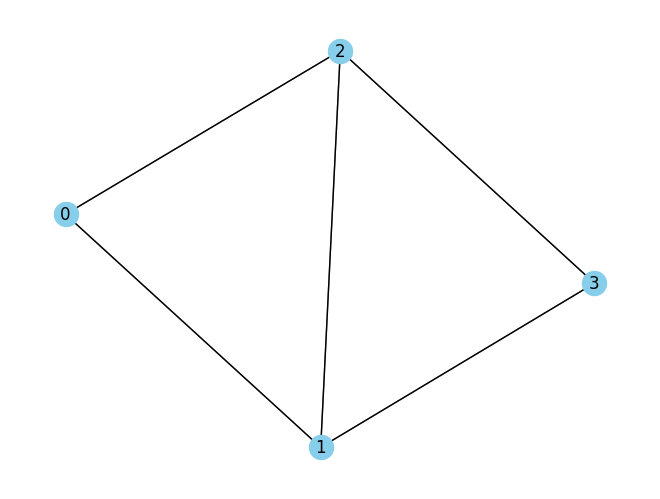

In [45]:
# Матрица смежности (пример)
adjacency_matrix = [
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 0]
]

# Получение списка рёбер из матрицы смежности
edges = []
num_vertices = len(adjacency_matrix)
for i in range(num_vertices):
    for j in range(i + 1, num_vertices):
        if adjacency_matrix[i][j] == 1:
            edges.append((i, j))

# Создание графа из списка рёбер
G = nx.Graph(edges)
# Расположение вершин
pos = nx.spring_layout(G)
# Нарисуем вершины
nx.draw(G, pos, with_labels=True, node_size=300, node_color="skyblue")
# Нарисуем рёбра
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, edge_color="black")

plt.show()

In [42]:
def incidence_to_adjacency(incidence_matrix):
    num_vertices, num_edges = len(incidence_matrix), len(incidence_matrix[0])
    adjacency_matrix = [[0] * num_vertices for _ in range(num_vertices)]

    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            for k in range(num_edges):
                if incidence_matrix[i][k] == 1 and incidence_matrix[j][k] == 1:
                    adjacency_matrix[i][j] = 1
                    adjacency_matrix[j][i] = 1
                    break

    return adjacency_matrix

# Пример использования:
incidence_matrix = [
    [1, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 1, 0],
    [0, 0, 1, 0]
]

adjacency_matrix = incidence_to_adjacency(incidence_matrix)
for row in adjacency_matrix:
    print(row)


[0, 1, 1, 0]
[1, 0, 1, 1]
[1, 1, 0, 1]
[0, 1, 1, 0]


**Московское метро**

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

In [32]:
LINES = {
    1: 'Сокольническая линия',
    2: 'Замоскворецкая линия',
    3: 'Арбатско-Покровская линия',
    4: 'Филевская линия',
    5: 'Кольцевая линия',
    6: 'Калужско-Рижская линия',
    7: 'Таганско-Краснопресненская линия',
    8: 'Калининско-Солнцевская линия',
    9: 'Серпуховско-Тимирязевская линия',
    10: 'Люблинско-Дмитровская линия',
    11: 'Каховская линия',
    12: 'Бутовская линия',
    13: 'Московский монорельс',
    14: 'Московское центральное кольцо',
    15: 'Большая кольцевая линия'
}


STATIONS = {
    1: {'line': 1, 'name': 'Бульвар Рокоссовского'},
    2: {'line': 1, 'name': 'Черкизовская'},
    3: {'line': 1, 'name': 'Преображенская площадь'},
    4: {'line': 1, 'name': 'Сокольники'},
    5: {'line': 1, 'name': 'Красносельская'},
    6: {'line': 1, 'name': 'Комсомольская'},
    7: {'line': 1, 'name': 'Красные Ворота'},
    8: {'line': 1, 'name': 'Чистые пруды'},
    9: {'line': 1, 'name': 'Лубянка'},
    10: {'line': 1, 'name': 'Охотный Ряд'},
    11: {'line': 1, 'name': 'Библиотека имени Ленина'},
    12: {'line': 1, 'name': 'Кропоткинская'},
    13: {'line': 1, 'name': 'Парк культуры'},
    14: {'line': 1, 'name': 'Фрунзенская'},
    15: {'line': 1, 'name': 'Спортивная'},
    16: {'line': 1, 'name': 'Воробьёвы горы'},
    17: {'line': 1, 'name': 'Университет'},
    18: {'line': 1, 'name': 'Проспект Вернадского'},
    19: {'line': 1, 'name': 'Юго-Западная'},
    20: {'line': 2, 'name': 'Речной вокзал'},
    21: {'line': 2, 'name': 'Водный стадион'},
    22: {'line': 2, 'name': 'Войковская'},
    23: {'line': 2, 'name': 'Сокол'},
    24: {'line': 2, 'name': 'Аэропорт'},
    25: {'line': 2, 'name': 'Динамо'},
    26: {'line': 2, 'name': 'Белорусская'},
    27: {'line': 2, 'name': 'Маяковская'},
    28: {'line': 2, 'name': 'Тверская'},
    29: {'line': 2, 'name': 'Театральная'},
    30: {'line': 2, 'name': 'Новокузнецкая'},
    31: {'line': 2, 'name': 'Павелецкая'},
    32: {'line': 2, 'name': 'Автозаводская'},
    33: {'line': 2, 'name': 'Коломенская'},
    34: {'line': 2, 'name': 'Каширская'},
    35: {'line': 2, 'name': 'Кантемировская'},
    36: {'line': 2, 'name': 'Царицыно'},
    37: {'line': 2, 'name': 'Орехово'},
    38: {'line': 2, 'name': 'Домодедовская'},
    39: {'line': 2, 'name': 'Красногвардейская'},
    40: {'line': 3, 'name': 'Щёлковская'},
    41: {'line': 3, 'name': 'Первомайская'},
    42: {'line': 3, 'name': 'Измайловская'},
    43: {'line': 3, 'name': 'Партизанская'},
    44: {'line': 3, 'name': 'Семёновская'},
    45: {'line': 3, 'name': 'Электрозаводская'},
    46: {'line': 3, 'name': 'Бауманская'},
    47: {'line': 3, 'name': 'Курская'},
    48: {'line': 3, 'name': 'Площадь Революции'},
    49: {'line': 3, 'name': 'Арбатская'},
    50: {'line': 3, 'name': 'Смоленская'},
    51: {'line': 3, 'name': 'Киевская'},
    52: {'line': 3, 'name': 'Парк Победы'},
    53: {'line': 3, 'name': 'Славянский бульвар'},
    54: {'line': 3, 'name': 'Кунцевская'},
    55: {'line': 3, 'name': 'Молодёжная'},
    56: {'line': 3, 'name': 'Крылатское'},
    57: {'line': 3, 'name': 'Строгино'},
    58: {'line': 4, 'name': 'Кунцевская'},
    59: {'line': 4, 'name': 'Пионерская'},
    60: {'line': 4, 'name': 'Филёвский парк'},
    61: {'line': 4, 'name': 'Багратионовская'},
    62: {'line': 4, 'name': 'Фили'},
    63: {'line': 4, 'name': 'Кутузовская'},
    64: {'line': 4, 'name': 'Студенческая'},
    65: {'line': 4, 'name': 'Киевская'},
    66: {'line': 4, 'name': 'Смоленская'},
    67: {'line': 4, 'name': 'Арбатская'},
    68: {'line': 4, 'name': 'Александровский сад'},
    69: {'line': 4, 'name': 'Выставочная'},
    70: {'line': 4, 'name': 'Международная'},
    71: {'line': 5, 'name': 'Парк культуры'},
    72: {'line': 5, 'name': 'Октябрьская'},
    73: {'line': 5, 'name': 'Добрынинская'},
    74: {'line': 5, 'name': 'Павелецкая'},
    75: {'line': 5, 'name': 'Таганская'},
    76: {'line': 5, 'name': 'Курская'},
    77: {'line': 5, 'name': 'Комсомольская'},
    78: {'line': 5, 'name': 'Проспект Мира'},
    79: {'line': 5, 'name': 'Новослободская'},
    80: {'line': 5, 'name': 'Белорусская'},
    81: {'line': 5, 'name': 'Краснопресненская'},
    82: {'line': 5, 'name': 'Киевская'},
    83: {'line': 6, 'name': 'Медведково'},
    84: {'line': 6, 'name': 'Бабушкинская'},
    85: {'line': 6, 'name': 'Свиблово'},
    86: {'line': 6, 'name': 'Ботанический сад'},
    87: {'line': 6, 'name': 'ВДНХ'},
    88: {'line': 6, 'name': 'Алексеевская'},
    89: {'line': 6, 'name': 'Рижская'},
    90: {'line': 6, 'name': 'Проспект Мира'},
    91: {'line': 6, 'name': 'Сухаревская'},
    92: {'line': 6, 'name': 'Тургеневская'},
    93: {'line': 6, 'name': 'Китай-город'},
    94: {'line': 6, 'name': 'Третьяковская'},
    95: {'line': 6, 'name': 'Октябрьская'},
    96: {'line': 6, 'name': 'Шаболовская'},
    97: {'line': 6, 'name': 'Ленинский проспект'},
    98: {'line': 6, 'name': 'Академическая'},
    99: {'line': 6, 'name': 'Профсоюзная'},
    100: {'line': 6, 'name': 'Новые Черёмушки'},
    101: {'line': 6, 'name': 'Калужская'},
    102: {'line': 6, 'name': 'Беляево'},
    103: {'line': 6, 'name': 'Коньково'},
    104: {'line': 6, 'name': 'Тёплый Стан'},
    105: {'line': 6, 'name': 'Ясенево'},
    106: {'line': 6, 'name': 'Новоясеневская'},
    107: {'line': 7, 'name': 'Планерная'},
    108: {'line': 7, 'name': 'Сходненская'},
    109: {'line': 7, 'name': 'Тушинская'},
    110: {'line': 7, 'name': 'Щукинская'},
    111: {'line': 7, 'name': 'Октябрьское Поле'},
    112: {'line': 7, 'name': 'Полежаевская'},
    113: {'line': 7, 'name': 'Беговая'},
    114: {'line': 7, 'name': 'Улица 1905 года'},
    115: {'line': 7, 'name': 'Баррикадная'},
    116: {'line': 7, 'name': 'Пушкинская'},
    117: {'line': 7, 'name': 'Кузнецкий Мост'},
    118: {'line': 7, 'name': 'Китай-город'},
    119: {'line': 7, 'name': 'Таганская'},
    120: {'line': 7, 'name': 'Пролетарская'},
    121: {'line': 7, 'name': 'Волгоградский проспект'},
    122: {'line': 7, 'name': 'Текстильщики'},
    123: {'line': 7, 'name': 'Кузьминки'},
    124: {'line': 7, 'name': 'Рязанский проспект'},
    125: {'line': 7, 'name': 'Выхино'},
    126: {'line': 8, 'name': 'Новогиреево'},
    127: {'line': 8, 'name': 'Перово'},
    128: {'line': 8, 'name': 'Шоссе Энтузиастов'},
    129: {'line': 8, 'name': 'Авиамоторная'},
    130: {'line': 8, 'name': 'Площадь Ильича'},
    131: {'line': 8, 'name': 'Марксистская'},
    132: {'line': 8, 'name': 'Третьяковская'},
    133: {'line': 9, 'name': 'Алтуфьево'},
    134: {'line': 9, 'name': 'Бибирево'},
    135: {'line': 9, 'name': 'Отрадное'},
    136: {'line': 9, 'name': 'Владыкино'},
    137: {'line': 9, 'name': 'Петровско-Разумовская'},
    138: {'line': 9, 'name': 'Тимирязевская'},
    139: {'line': 9, 'name': 'Дмитровская'},
    140: {'line': 9, 'name': 'Савёловская'},
    141: {'line': 9, 'name': 'Менделеевская'},
    142: {'line': 9, 'name': 'Цветной бульвар'},
    143: {'line': 9, 'name': 'Чеховская'},
    144: {'line': 9, 'name': 'Боровицкая'},
    145: {'line': 9, 'name': 'Полянка'},
    146: {'line': 9, 'name': 'Серпуховская'},
    147: {'line': 9, 'name': 'Тульская'},
    148: {'line': 9, 'name': 'Нагатинская'},
    149: {'line': 9, 'name': 'Нагорная'},
    150: {'line': 9, 'name': 'Нахимовский проспект'},
    151: {'line': 9, 'name': 'Севастопольская'},
    152: {'line': 9, 'name': 'Чертановская'},
    153: {'line': 9, 'name': 'Южная'},
    154: {'line': 9, 'name': 'Пражская'},
    155: {'line': 9, 'name': 'Улица Академика Янгеля'},
    156: {'line': 9, 'name': 'Аннино'},
    157: {'line': 9, 'name': 'Бульвар Дмитрия Донского'},
    158: {'line': 10, 'name': 'Трубная'},
    159: {'line': 10, 'name': 'Сретенский бульвар'},
    160: {'line': 10, 'name': 'Чкаловская'},
    161: {'line': 10, 'name': 'Римская'},
    162: {'line': 10, 'name': 'Крестьянская Застава'},
    163: {'line': 10, 'name': 'Дубровка'},
    164: {'line': 10, 'name': 'Кожуховская'},
    165: {'line': 10, 'name': 'Печатники'},
    166: {'line': 10, 'name': 'Волжская'},
    167: {'line': 10, 'name': 'Люблино'},
    168: {'line': 10, 'name': 'Братиславская'},
    169: {'line': 10, 'name': 'Марьино'},
    170: {'line': 11, 'name': 'Каширская'},
    171: {'line': 11, 'name': 'Варшавская'},
    172: {'line': 11, 'name': 'Каховская'},
    173: {'line': 12, 'name': 'Улица Старокачаловская'},
    174: {'line': 12, 'name': 'Улица Скобелевская'},
    175: {'line': 12, 'name': 'Бульвар Адмирала Ушакова'},
    176: {'line': 12, 'name': 'Улица Горчакова'},
    177: {'line': 12, 'name': 'Бунинская аллея'},
    178: {'line': 3, 'name': 'Мякинино'},
    179: {'line': 3, 'name': 'Волоколамская'},
    180: {'line': 3, 'name': 'Митино'},
    181: {'line': 10, 'name': 'Марьина Роща'},
    182: {'line': 10, 'name': 'Достоевская'},
    183: {'line': 10, 'name': 'Борисово'},
    184: {'line': 10, 'name': 'Шипиловская'},
    185: {'line': 10, 'name': 'Зябликово'},
    186: {'line': 8, 'name': 'Новокосино'},
    187: {'line': 2, 'name': 'Алма-Атинская'},
    188: {'line': 3, 'name': 'Пятницкое шоссе'},
    189: {'line': 7, 'name': 'Лермонтовский проспект'},
    190: {'line': 7, 'name': 'Жулебино'},
    191: {'line': 12, 'name': 'Битцевский парк'},
    192: {'line': 12, 'name': 'Лесопарковая'},
    193: {'line': 8, 'name': 'Шелепиха'},
    194: {'line': 8, 'name': 'Парк Победы'},
    195: {'line': 7, 'name': 'Спартак'},
    196: {'line': 1, 'name': 'Тропарёво'},
    197: {'line': 7, 'name': 'Котельники'},
    198: {'line': 2, 'name': 'Технопарк'},
    199: {'line': 1, 'name': 'Румянцево'},
    200: {'line': 1, 'name': 'Саларьево'},
    201: {'line': 14, 'name': 'Ботанический сад'},
    202: {'line': 14, 'name': 'Владыкино'},
    203: {'line': 14, 'name': 'Окружная'},
    204: {'line': 14, 'name': 'Лихоборы'},
    205: {'line': 14, 'name': 'Коптево'},
    206: {'line': 14, 'name': 'Балтийская'},
    207: {'line': 14, 'name': 'Стрешнево'},
    208: {'line': 14, 'name': 'Панфиловская'},
    209: {'line': 14, 'name': 'Зорге'},
    210: {'line': 14, 'name': 'Хорошёво'},
    211: {'line': 14, 'name': 'Шелепиха'},
    212: {'line': 14, 'name': 'Деловой центр'},
    213: {'line': 14, 'name': 'Кутузовская'},
    214: {'line': 14, 'name': 'Лужники'},
    215: {'line': 14, 'name': 'Площадь Гагарина'},
    216: {'line': 14, 'name': 'Крымская'},
    217: {'line': 14, 'name': 'Верхние Котлы'},
    218: {'line': 14, 'name': 'ЗИЛ'},
    219: {'line': 14, 'name': 'Автозаводская'},
    220: {'line': 14, 'name': 'Дубровка'},
    221: {'line': 14, 'name': 'Угрешская'},
    222: {'line': 14, 'name': 'Новохохловская'},
    223: {'line': 14, 'name': 'Нижегородская'},
    224: {'line': 14, 'name': 'Андроновка'},
    225: {'line': 14, 'name': 'Шоссе Энтузиастов'},
    226: {'line': 14, 'name': 'Соколиная гора'},
    227: {'line': 14, 'name': 'Измайлово'},
    228: {'line': 14, 'name': 'Локомотив'},
    229: {'line': 14, 'name': 'Бульвар Рокоссовского'},
    230: {'line': 14, 'name': 'Белокаменная'},
    231: {'line': 14, 'name': 'Ростокино'},
    232: {'line': 10, 'name': 'Бутырская'},
    233: {'line': 10, 'name': 'Фонвизинская'},
    234: {'line': 10, 'name': 'Петровско-Разумовская'},
    235: {'line': 8, 'name': 'Минская'},
    236: {'line': 8, 'name': 'Ломоносовский проспект'},
    237: {'line': 8, 'name': 'Раменки'},
    238: {'line': 15, 'name': 'Деловой центр'},
    239: {'line': 15, 'name': 'Шелепиха'},
    240: {'line': 15, 'name': 'Хорошёвская'},
    241: {'line': 15, 'name': 'ЦСКА'},
    242: {'line': 15, 'name': 'Петровский парк'},
    243: {'line': 8, 'name': 'Хорошёвская'},
    244: {'line': 8, 'name': 'ЦСКА'},
    245: {'line': 8, 'name': 'Петровский парк'},
    246: {'line': 2, 'name': 'Ховрино'},
    247: {'line': 10, 'name': 'Окружная'},
    248: {'line': 10, 'name': 'Верхние Лихоборы'},
    249: {'line': 10, 'name': 'Селигерская'}
}

LINKS = [
    # List of connections between stations
    # (source, target, time)
    (1, 2, 190),
    (1, 229, 541),
    (2, 3, 145),
    (2, 228, 300),
    (3, 4, 200),
    (4, 5, 135),
    (5, 6, 115),
    (6, 7, 110),
    (6, 77, 360),
    (7, 8, 100),
    (8, 9, 115),
    (8, 92, 180),
    (8, 159, 180),
    (9, 10, 100),
    (9, 117, 180),
    (10, 11, 105),
    (10, 29, 240),
    (11, 12, 115),
    (11, 49, 300),
    (11, 68, 180),
    (11, 144, 360),
    (12, 13, 130),
    (13, 14, 150),
    (13, 71, 300),
    (14, 15, 95),
    (15, 16, 185),
    (15, 214, 360),
    (16, 17, 225),
    (17, 18, 180),
    (18, 19, 170),
    (19, 196, 170),
    (20, 21, 155),
    (20, 246, 240),
    (21, 22, 180),
    (22, 23, 170),
    (22, 206, 780),
    (23, 24, 130),
    (24, 25, 170),
    (25, 26, 180),
    (25, 242, 360),
    (25, 245, 360),
    (26, 27, 110),
    (26, 80, 180),
    (27, 28, 100),
    (28, 29, 100),
    (28, 116, 180),
    (28, 143, 240),
    (29, 30, 160),
    (29, 48, 300),
    (30, 31, 140),
    (30, 94, 180),
    (30, 132, 180),
    (31, 32, 180),
    (31, 74, 240),
    (32, 198, 140),
    (32, 219, 600),
    (33, 34, 200),
    (34, 35, 205),
    (34, 170, 180),
    (35, 36, 145),
    (36, 37, 165),
    (37, 38, 145),
    (38, 39, 150),
    (39, 185, 150),
    (39, 187, 250),
    (40, 41, 135),
    (41, 42, 170),
    (42, 43, 190),
    (43, 44, 165),
    (43, 227, 540),
    (44, 45, 110),
    (45, 46, 145),
    (46, 47, 175),
    (47, 48, 185),
    (47, 76, 240),
    (47, 160, 180),
    (48, 49, 125),
    (49, 50, 140),
    (49, 68, 180),
    (49, 144, 180),
    (50, 51, 105),
    (51, 52, 270),
    (51, 65, 240),
    (51, 82, 180),
    (52, 53, 260),
    (52, 194, 120),
    (53, 54, 170),
    (54, 55, 180),
    (54, 58, 180),
    (55, 56, 195),
    (56, 57, 420),
    (57, 178, 205),
    (58, 59, 130),
    (59, 60, 115),
    (60, 61, 115),
    (61, 62, 140),
    (62, 63, 145),
    (63, 64, 120),
    (63, 213, 360),
    (64, 65, 140),
    (65, 66, 130),
    (65, 69, 395),
    (65, 82, 360),
    (66, 67, 115),
    (67, 68, 65),
    (69, 70, 120),
    (69, 238, 180),
    (70, 212, 360),
    (71, 72, 120),
    (72, 73, 105),
    (72, 95, 180),
    (73, 74, 115),
    (73, 146, 180),
    (74, 75, 135),
    (75, 76, 170),
    (75, 119, 180),
    (75, 131, 180),
    (76, 77, 175),
    (76, 160, 360),
    (77, 78, 160),
    (78, 79, 160),
    (78, 90, 180),
    (79, 80, 135),
    (79, 141, 180),
    (80, 81, 165),
    (81, 82, 160),
    (81, 115, 180),
    (82, 71, 175),
    (83, 84, 160),
    (84, 85, 140),
    (85, 86, 135),
    (86, 87, 210),
    (86, 201, 240),
    (87, 88, 135),
    (88, 89, 140),
    (89, 90, 130),
    (90, 91, 120),
    (91, 92, 100),
    (92, 93, 125),
    (92, 159, 180),
    (93, 94, 170),
    (93, 118, 120),
    (94, 95, 155),
    (94, 132, 120),
    (95, 96, 130),
    (96, 97, 190),
    (97, 98, 185),
    (97, 215, 180),
    (98, 99, 120),
    (99, 100, 100),
    (100, 101, 140),
    (101, 102, 170),
    (102, 103, 115),
    (103, 104, 150),
    (104, 105, 170),
    (105, 106, 140),
    (106, 191, 120),
    (107, 108, 110),
    (108, 109, 175),
    (109, 195, 100),
    (110, 111, 185),
    (111, 112, 200),
    (111, 208, 720),
    (112, 113, 150),
    (112, 210, 720),
    (112, 240, 180),
    (112, 243, 180),
    (113, 114, 130),
    (114, 115, 125),
    (115, 116, 165),
    (116, 117, 120),
    (116, 143, 240),
    (117, 118, 90),
    (118, 119, 170),
    (119, 120, 145),
    (119, 131, 240),
    (120, 121, 150),
    (120, 162, 300),
    (121, 122, 245),
    (122, 123, 185),
    (123, 124, 185),
    (124, 125, 170),
    (125, 189, 240),
    (126, 127, 150),
    (127, 128, 195),
    (128, 129, 150),
    (128, 225, 600),
    (129, 130, 180),
    (130, 131, 175),
    (130, 161, 180),
    (131, 132, 160),
    (133, 134, 150),
    (134, 135, 195),
    (135, 136, 165),
    (136, 137, 145),
    (136, 202, 420),
    (137, 138, 200),
    (138, 139, 110),
    (139, 140, 120),
    (140, 141, 120),
    (141, 142, 160),
    (142, 143, 110),
    (142, 158, 180),
    (143, 144, 150),
    (144, 145, 145),
    (145, 146, 120),
    (146, 147, 205),
    (147, 148, 225),
    (148, 149, 120),
    (148, 217, 720),
    (149, 150, 100),
    (150, 151, 110),
    (151, 152, 125),
    (151, 172, 240),
    (152, 153, 190),
    (153, 154, 110),
    (154, 155, 150),
    (155, 156, 115),
    (156, 157, 160),
    (157, 173, 120),
    (158, 159, 160),
    (159, 160, 160),
    (160, 161, 175),
    (161, 162, 165),
    (162, 163, 145),
    (163, 164, 130),
    (163, 220, 780),
    (164, 165, 240),
    (165, 166, 160),
    (166, 167, 170),
    (167, 168, 185),
    (168, 169, 140),
    (169, 183, 150),
    (170, 171, 175),
    (171, 172, 125),
    (173, 174, 295),
    (174, 175, 80),
    (175, 176, 105),
    (176, 177, 115),
    (178, 179, 180),
    (179, 180, 170),
    (180, 188, 120),
    (181, 182, 150),
    (181, 232, 205),
    (182, 158, 150),
    (183, 184, 130),
    (184, 185, 110),
    (186, 126, 200),
    (189, 190, 180),
    (190, 197, 120),
    (191, 192, 180),
    (192, 173, 180),
    (193, 194, 310),
    (193, 211, 180),
    (193, 239, 27),
    (194, 235, 180),
    (195, 110, 185),
    (196, 199, 180),
    (198, 33, 140),
    (199, 200, 145),
    (201, 202, 290),
    (202, 203, 170),
    (203, 204, 180),
    (204, 205, 210),
    (205, 206, 265),
    (206, 207, 180),
    (207, 208, 180),
    (208, 209, 160),
    (209, 210, 160),
    (210, 211, 225),
    (210, 240, 720),
    (210, 243, 720),
    (211, 212, 150),
    (211, 239, 180),
    (212, 213, 150),
    (213, 214, 220),
    (214, 215, 240),
    (215, 216, 230),
    (216, 217, 140),
    (217, 218, 200),
    (218, 219, 150),
    (219, 220, 150),
    (220, 221, 155),
    (221, 222, 170),
    (222, 223, 165),
    (223, 224, 210),
    (224, 225, 160),
    (225, 226, 170),
    (226, 227, 190),
    (227, 228, 175),
    (228, 229, 180),
    (229, 230, 195),
    (230, 231, 210),
    (231, 201, 180),
    (232, 233, 150),
    (233, 234, 180),
    (234, 137, 60),
    (234, 247, 120),
    (235, 236, 240),
    (236, 237, 120),
    (238, 239, 180),
    (239, 240, 230),
    (240, 241, 120),
    (241, 242, 140),
    (241, 244, 29),
    (242, 245, 27),
    (243, 193, 230),
    (243, 240, 29),
    (243, 244, 120),
    (244, 245, 140),
    (247, 203, 480),
    (247, 248, 120),
    (248, 249, 180)
]

Узел Киевская. имеет PageRank: 0.006491062209637918
Узел Библиотека имени Ленина имеет PageRank: 0.006036073526668906
Узел Арбатская имеет PageRank: 0.005987028033988995
Узел Полежаевская имеет PageRank: 0.005930477926947821
Узел Красногвардейская имеет PageRank: 0.005888293076067132


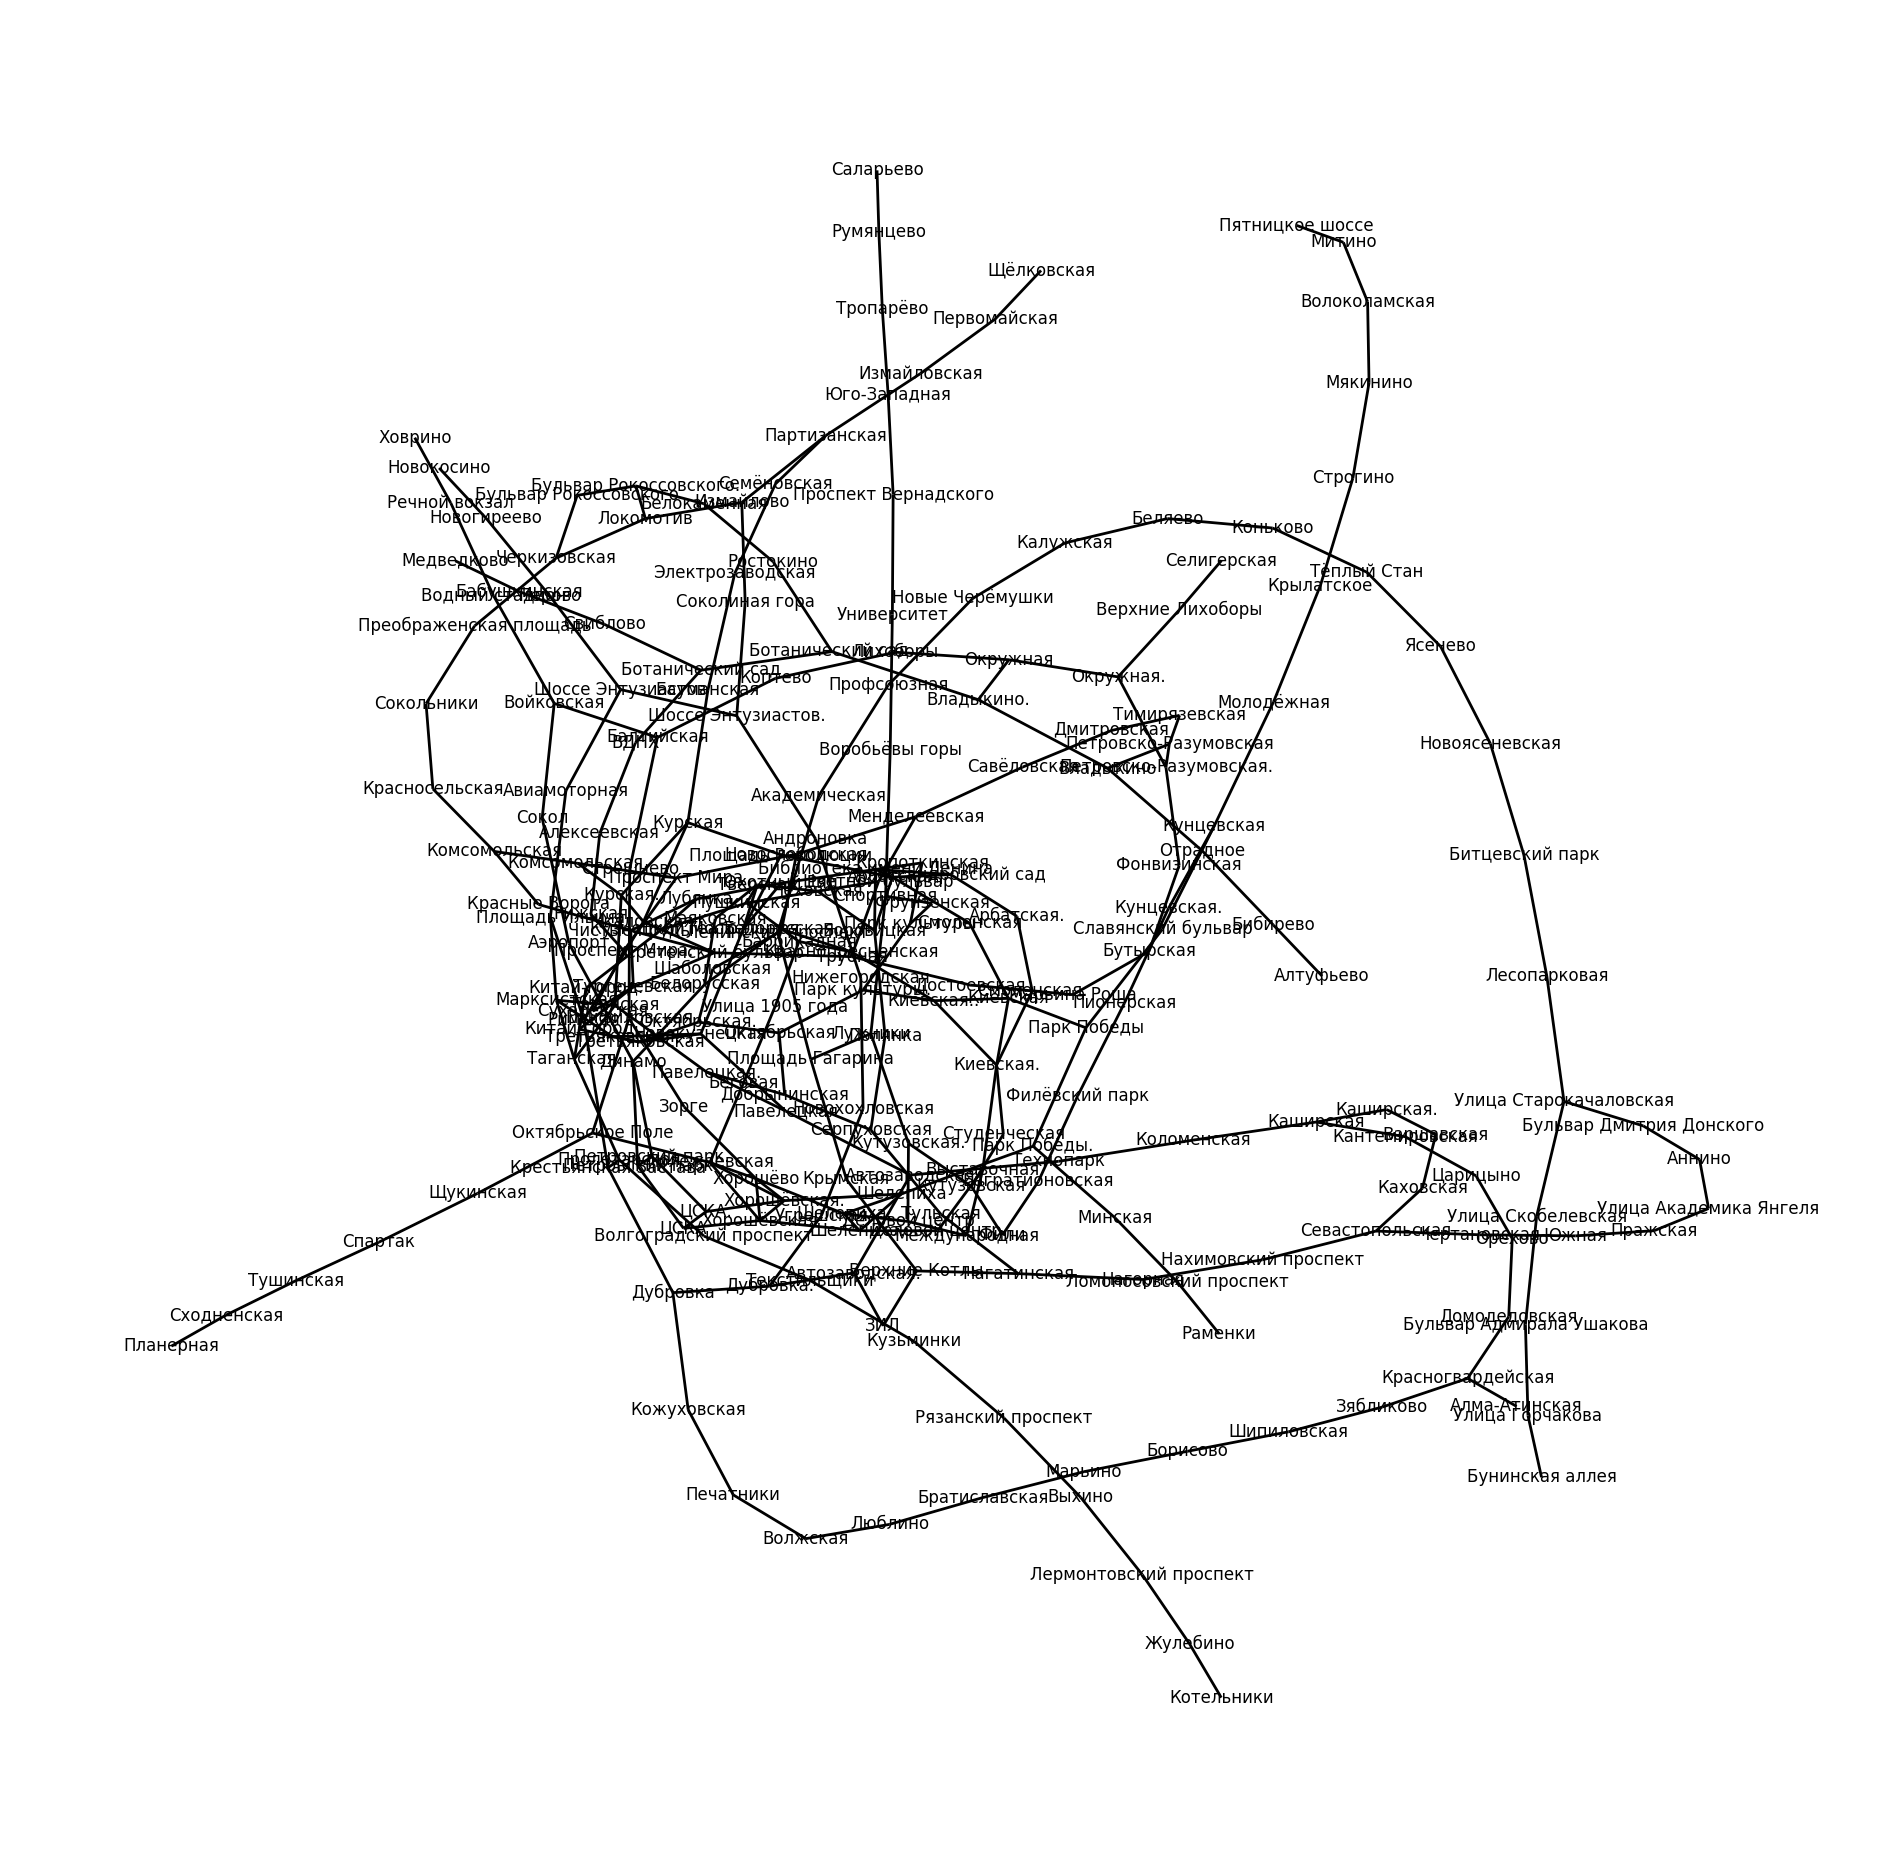

In [35]:
# Создаем пустой граф
G = nx.Graph()

# Добавляем узлы (станции) в граф
for st in STATIONS:
    st_data = STATIONS[st]
    st_name = st_data['name']
    # Проверяем, есть ли уже узел с таким именем, и если есть, добавляем к имени точку
    while G.has_node(st_name):
        st_name += '.'
    # Обновляем имя станции в словаре STATIONS
    STATIONS[st]['name'] = st_name
    # Добавляем узел в граф с указанием имени станции
    G.add_node(st_name, name=st_name)

# Добавляем ребра (связи между станциями) в граф
for l_data in LINKS:
    l_first = STATIONS[l_data[0]]
    l_second = STATIONS[l_data[1]]
    # Добавляем ребро между двумя станциями
    G.add_edge(l_first['name'], l_second['name'])


pagerank = nx.pagerank(G)
top_5_nodes = sorted(pagerank, key=pagerank.get, reverse=True)[:5]
for node in top_5_nodes:
    print(f"Узел {node} имеет PageRank: {pagerank[node]}")

# Создаем изображение графа
plt.figure(figsize=(24, 24))
# Определяем позиции узлов на графе
pos = nx.spring_layout(G, seed=1)
# Рисуем узлы графа
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=node_color)
# Рисуем ребра графа
nx.draw_networkx_edges(G, pos, edge_color='black', width=2)
# Добавляем метки для узлов
nx.draw_networkx_labels(G, pos)
# Отключаем оси координат
plt.axis('off')
# Отображаем граф
plt.show()
